In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv('data/city_day.csv')
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
# Check missing values
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [4]:
# Fill missing numeric values with mean
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

In [5]:
# Drop irrelevant columns
data = data.drop(['City', 'Date', 'AQI_Bucket'], axis=1)

In [6]:
data.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [ ]:
#1️⃣ Distribution of AQI

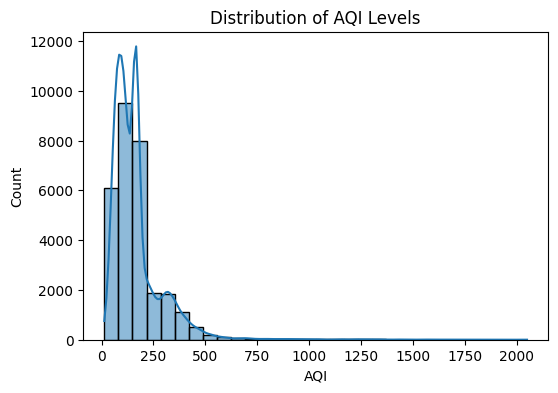

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(data['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI Levels')
plt.show()

In [ ]:
#2️⃣ Correlation Heatmap

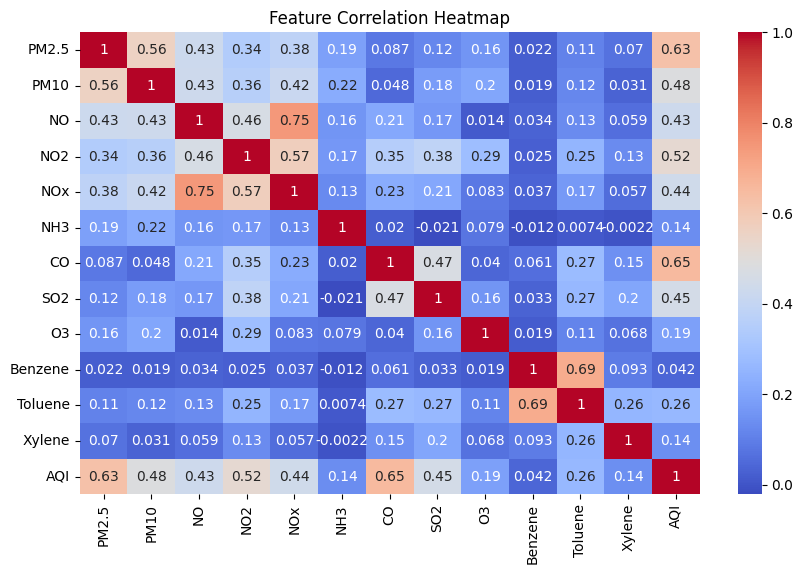

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
#3️⃣ Pollutant vs AQI Relationship

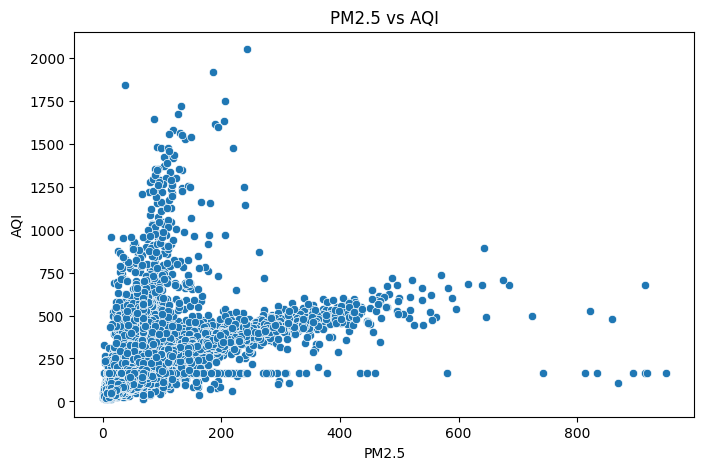

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='PM2.5', y='AQI', data=data)
plt.title('PM2.5 vs AQI')
plt.show()

In [ ]:
#⚙️ Step 5: Feature Selection & Splitting the Data

In [10]:
X = data.drop('AQI', axis=1)
y = data['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#⚖️ Step 6: Feature Scaling

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#🧩 Step 7: Model Training

In [12]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
#🧮 Step 8: Model Evaluation

In [13]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1750.78
Root Mean Squared Error: 41.84
R² Score: 0.88


In [ ]:
#🔍 Step 9: Feature Importance

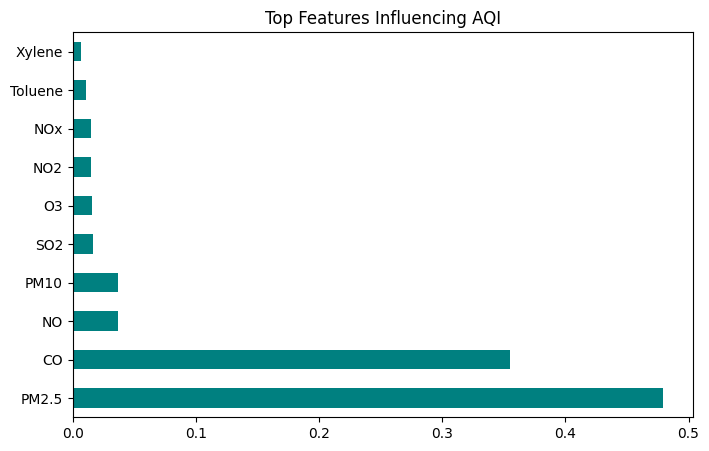

In [14]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', figsize=(8,5), color='teal')
plt.title('Top Features Influencing AQI')
plt.show()

In [ ]:
#🧾 Step 10: Save Model (Optional)

In [15]:
import pickle
pickle.dump(model, open('aqi_rf_model.pkl', 'wb'))